In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | kenai
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | wamba
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | oussouye
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | bambous viri

Processing Record 32 of Set 4 | san patricio
Processing Record 33 of Set 4 | hualmay
Processing Record 34 of Set 4 | fort nelson
Processing Record 35 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 36 of Set 4 | peterhead
Processing Record 37 of Set 4 | yarada
Processing Record 38 of Set 4 | yakeshi
Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | sibolga
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | usakos
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | bhan
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | killybegs
Processing Record 47 of Set 4 | teya
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 50 of Set 4 | san pedro de macoris
Processing Record 1 of Set 5 | itupiranga
Processing Record 2 of Set 5 | nioaque
Processing Record 3 of Set 5 | pleasanton
Processing Record 4 of Set 5 | bira
Proc

Processing Record 21 of Set 8 | agirish
Processing Record 22 of Set 8 | lichinga
Processing Record 23 of Set 8 | andenes
Processing Record 24 of Set 8 | grand-lahou
Processing Record 25 of Set 8 | mount isa
Processing Record 26 of Set 8 | tabuk
Processing Record 27 of Set 8 | dingle
Processing Record 28 of Set 8 | panama city
Processing Record 29 of Set 8 | dolores
Processing Record 30 of Set 8 | bozeman
Processing Record 31 of Set 8 | zhengjiatun
Processing Record 32 of Set 8 | almaznyy
Processing Record 33 of Set 8 | cururupu
Processing Record 34 of Set 8 | kichera
Processing Record 35 of Set 8 | zlitan
Processing Record 36 of Set 8 | dzhuryn
Processing Record 37 of Set 8 | okato
Processing Record 38 of Set 8 | samarai
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | ust-tsilma
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | tateyama
Processing Record 44 of Set 8 | desna
Processing Re

Processing Record 8 of Set 12 | denpasar
Processing Record 9 of Set 12 | pouebo
Processing Record 10 of Set 12 | olafsvik
Processing Record 11 of Set 12 | shihezi
Processing Record 12 of Set 12 | gorontalo
Processing Record 13 of Set 12 | tenenkou
Processing Record 14 of Set 12 | kantabanji
Processing Record 15 of Set 12 | lolua
City not found. Skipping...
Processing Record 16 of Set 12 | micheweni
Processing Record 17 of Set 12 | alofi
Processing Record 18 of Set 12 | airai
Processing Record 19 of Set 12 | chimoio
Processing Record 20 of Set 12 | karwar
Processing Record 21 of Set 12 | viedma
Processing Record 22 of Set 12 | hobyo
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | carauari
Processing Record 25 of Set 12 | cap malheureux
Processing Record 26 of Set 12 | laguna
Processing Record 27 of Set 12 | tacoronte
Processing Record 28 of Set 12 | humberto de campos
Processing Record 29 of Set 12 | oda
Processing Record 30 of Set 12 | kamenskoye
City not found.

566

In [8]:
len(city_data)

566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,79.68,75,100,14.03,TO,2022-01-31 19:18:29
1,Jamestown,42.0970,-79.2353,34.52,30,0,0.00,US,2022-01-31 19:13:50
2,Kodiak,57.7900,-152.4072,20.71,79,100,5.75,US,2022-01-31 19:17:58
3,Lasa,46.6166,10.7002,40.91,93,100,8.28,IT,2022-01-31 19:18:30
4,Kenai,60.5544,-151.2583,6.03,86,0,0.00,US,2022-01-31 19:18:31
5,Wamba,8.9333,8.6000,73.96,14,76,3.49,NG,2022-01-31 19:18:31
6,Ancud,-41.8697,-73.8203,62.42,61,5,10.51,CL,2022-01-31 19:16:40
7,Husavik,66.0449,-17.3389,19.31,94,100,5.12,IS,2022-01-31 19:18:32
8,Carnarvon,-24.8667,113.6333,78.87,73,0,20.71,AU,2022-01-31 19:18:33
9,Mar Del Plata,-38.0023,-57.5575,65.88,55,100,15.01,AR,2022-01-31 19:13:49


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-31 19:18:29,-21.2000,-175.2000,79.68,75,100,14.03
1,Jamestown,US,2022-01-31 19:13:50,42.0970,-79.2353,34.52,30,0,0.00
2,Kodiak,US,2022-01-31 19:17:58,57.7900,-152.4072,20.71,79,100,5.75
3,Lasa,IT,2022-01-31 19:18:30,46.6166,10.7002,40.91,93,100,8.28
4,Kenai,US,2022-01-31 19:18:31,60.5544,-151.2583,6.03,86,0,0.00
...,...,...,...,...,...,...,...,...,...
561,Alibag,IN,2022-01-31 19:35:16,18.6411,72.8792,71.67,55,1,8.81
562,Guarapari,BR,2022-01-31 19:35:16,-20.6667,-40.4975,84.09,72,75,7.25
563,Mae Ramat,TH,2022-01-31 19:35:17,16.9840,98.5166,57.85,88,96,1.36
564,Okhotsk,RU,2022-01-31 19:35:17,59.3833,143.3000,5.14,74,94,18.19


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

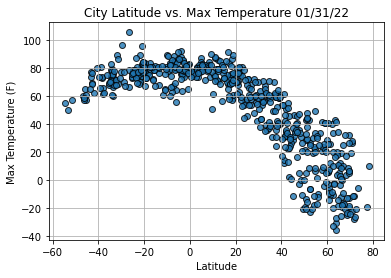

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

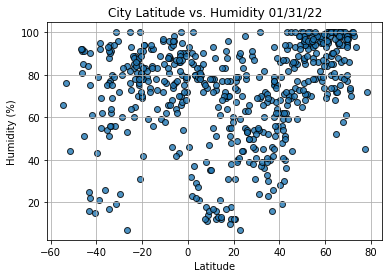

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

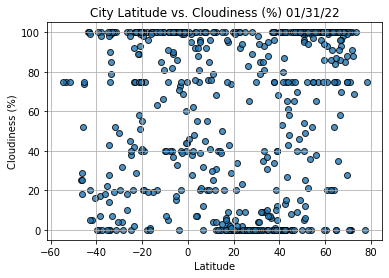

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()